<H3>Task 1: How well can you classify individual micros assuming all micros per subject have the same label?</H3>

- A patient has cancer or not (all micros are malignant or benign)
- Classification problem



In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [20]:
df = pd.read_excel('Reduced_Features_for_TAI_project.xlsx')

df_negatives = df[df['Label'] == 0]
df_positives = df[df['Label'] == 1]
labels_GT = df[['Patient ID', 'Label']].copy() # saving the original labels of the micros to compare to later
df.drop(columns=['Patient ID', 'Label'], axis=1, inplace=True) # dropping the Patient ID and Label columns as they will be labeled as a whole for each patient

df.describe()

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,...,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,0.666190,2.462975,0.590587,4.212117,1497.921542,1594.268004,2119.089859,271.458163,2.968610,11.251502,...,9.493928,263.808079,0.351824,3.164037,0.159556,0.458397,1.292847,0.931269,0.905466,73.400175
std,0.168063,0.546251,0.272699,4.286353,1289.535822,1387.119079,1528.700938,218.219184,3.454322,8.819559,...,8.463617,2184.304828,0.216732,1.182988,0.162182,0.243215,0.247532,0.035136,0.512119,81.520035
min,0.039069,0.000000,-1.005865,0.083283,1.000000,1.000000,1.000000,0.000000,0.054849,1.256063,...,2.040067,0.030881,0.058536,1.284810,0.000000,0.122810,0.907201,0.811843,0.234128,3.099939
25%,0.550945,2.153519,0.450615,0.963731,316.233814,327.236986,637.213037,54.969021,0.654501,4.320566,...,6.113958,10.276716,0.191192,2.531290,0.043387,0.322079,1.154897,0.902421,0.628734,22.119894
50%,0.677985,2.371766,0.580983,2.686606,1247.979233,1297.284496,2121.746771,249.695632,1.718228,8.927913,...,8.837889,31.876325,0.295743,2.917387,0.086336,0.410345,1.224399,0.920535,0.801215,35.270240
75%,0.793857,2.665746,0.726457,6.188729,2428.843420,2579.808869,3397.403762,453.547995,3.987678,15.864163,...,11.523476,111.915767,0.468013,3.432697,0.248412,0.530553,1.356257,0.962220,1.035546,102.038460
max,1.000000,8.111111,2.666667,29.198575,6454.319835,6484.443965,6308.111352,913.448742,31.799360,71.411609,...,295.617964,99073.022883,2.957963,22.889047,0.929873,5.265915,3.486119,1.000000,9.730689,675.982582


In [21]:
df_negatives.describe()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
count,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,...,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.0
mean,25.629208,0.671023,2.541160,0.632821,3.321986,1236.248451,1320.382140,1818.425807,232.680590,2.258851,...,178.060701,0.367301,3.059539,0.153275,0.479440,1.308693,0.928895,0.945080,70.026105,0.0
std,13.435357,0.167790,0.592647,0.273972,3.400728,1116.404818,1228.398235,1411.280549,199.957520,2.581544,...,1547.136954,0.210378,1.151980,0.153703,0.218367,0.274760,0.035312,0.462994,80.628899,0.0
min,1.000000,0.198762,1.000000,-0.595228,0.103922,1.000000,1.600000,1.000000,0.000000,0.054849,...,0.046149,0.058536,1.284810,0.000000,0.134837,0.907201,0.811843,0.234128,5.736444,0.0
25%,11.000000,0.551223,2.202585,0.484116,0.803612,236.207407,238.635834,444.799470,37.589619,0.552561,...,10.601224,0.212227,2.493330,0.045371,0.347143,1.152852,0.900626,0.677886,22.238506,0.0
50%,32.000000,0.680345,2.428700,0.617136,2.097888,956.041056,1001.591082,1684.379144,191.550539,1.393530,...,31.490510,0.306185,2.849771,0.085443,0.431634,1.231523,0.918179,0.853759,34.148616,0.0
75%,36.000000,0.797426,2.762318,0.762858,4.757779,1973.992690,2085.831565,2981.890057,394.862011,2.896822,...,89.861111,0.482182,3.315686,0.231550,0.554190,1.377855,0.958302,1.082816,93.145994,0.0
max,46.000000,1.000000,8.111111,2.666667,25.203036,5889.561452,5857.746937,5927.993687,806.808143,25.262535,...,63032.030205,2.335138,22.889047,0.929873,3.971937,3.486119,1.000000,8.059251,675.982582,0.0


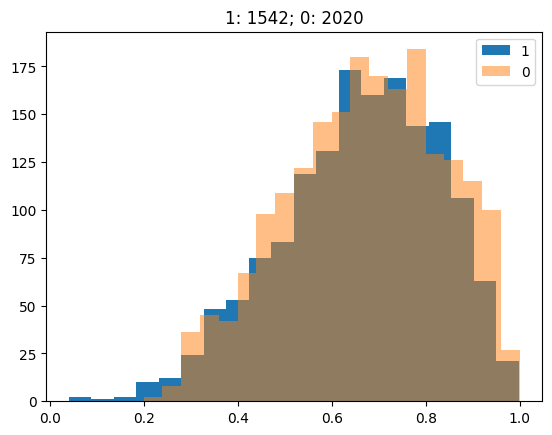

In [22]:
# Plotting some histograms just to see if there's a visual difference
# sns.barplot(data=df_positives, x=df_positives['original_firstorder_Kurtosis'])
# sns.barplot(data=df_negatives, x=df_negatives['original_firstorder_Kurtosis'])
plt.hist(df_positives['original_shape_Elongation'], bins=20, label='1')
plt.hist(df_negatives['original_shape_Elongation'], bins=20, alpha=0.5, label='0')
plt.legend()
plt.title(f"1: {len(df_positives['original_shape_Elongation'])}; 0: {len(df_negatives['original_shape_Elongation'])}")

plt.show()

In [23]:
pos_description = df_positives.describe()
neg_description = df_negatives.describe()

In [25]:
# df is X, GT_labels is Y
X_train, X_test, y_train, y_test = train_test_split(df, labels_GT, test_size=0.2, random_state=100)
y_train = y_train.iloc[:, -1] # leaving out the id of the labels
y_test = y_test.iloc[:, -1]

model = LogisticRegression(max_iter=1000)

selector = SelectFromModel(estimator=model, threshold='median') # feature selector to filter out the less significant ones
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]

X_train_selected = selector.transform(X_train) # reduce X to the selected features
X_test_selected = selector.transform(X_test)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# show selected features
print(f"Selected {X_train_selected.shape[1]} features!") # how can I know which features were selected?
print(f"\n\nThe selected features were:\n{selector.get_feature_names_out()}")

Selected 75 features!


The selected features were:
['original_firstorder_Kurtosis' 'original_firstorder_Skewness'
 'wavelet-LHL_glrlm_RunVariance'
 'wavelet2-LHL_gldm_LargeDependenceEmphasis'
 'wavelet2-LLH_gldm_LargeDependenceEmphasis'
 'wavelet-LHL_gldm_LargeDependenceEmphasis'
 'wavelet2-LHL_gldm_DependenceVariance' 'wavelet2-LHL_glrlm_RunVariance'
 'wavelet-LHL_glrlm_LongRunEmphasis' 'wavelet-LHH_glrlm_LongRunEmphasis'
 'wavelet-LHH_glrlm_RunPercentage' 'wavelet2-LLH_glrlm_RunVariance'
 'wavelet-HHH_glrlm_LongRunEmphasis' 'wavelet2-LHH_glrlm_LongRunEmphasis'
 'wavelet2-LHH_glrlm_RunPercentage' 'wavelet-LHL_glrlm_RunPercentage'
 'wavelet2-HHH_glrlm_RunPercentage'
 'wavelet-LHH_glrlm_LongRunLowGrayLevelEmphasis'
 'wavelet2-LLH_glrlm_RunPercentage' 'wavelet-LHH_glrlm_ShortRunEmphasis'
 'log-sigma-3-0-mm-3D_glrlm_RunPercentage'
 'original_glrlm_LowGrayLevelRunEmphasis'
 'wavelet-HHH_glrlm_RunPercentage' 'original_glrlm_RunPercentage'
 'wavelet-HHL_glrlm_LongRunEmphasis'
 'wavelet-HHH_

In [27]:
# Training on the selected features
model.fit(X_train_selected, y_train)
accuracy = model.score(X_test_selected, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7180925666199158


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[337  70]
 [131 175]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       407
           1       0.71      0.57      0.64       306

    accuracy                           0.72       713
   macro avg       0.72      0.70      0.70       713
weighted avg       0.72      0.72      0.71       713



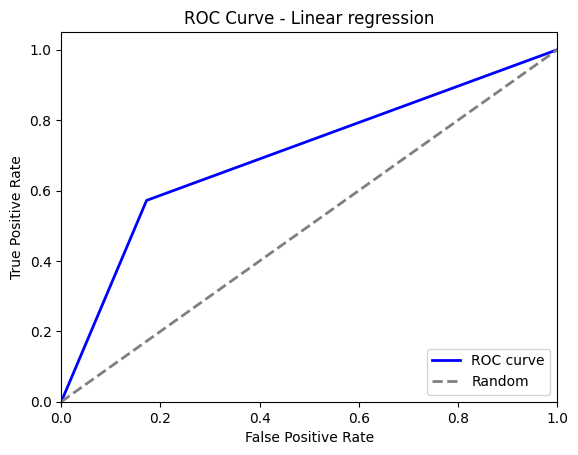

In [30]:
# testing
predictions = model.predict(X_test_selected)
conf_mat = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_mat}")

# classification report
print(classification_report(y_test, predictions, labels=[0, 1]))#, target_names=['Healthy', 'Lesion']))

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions) #false positive rate, true positive rate, decreasing thresholds on the decision function used to compute fpr and tpr
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Linear regression')
plt.legend(loc="lower right")

plt.savefig('Results/LR_75f_TS02.png')
plt.show()